### **Import Libraries**

In [51]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

### **Download Dataset from Kaggle**

In [52]:
path = kagglehub.dataset_download("architsharma01/loan-approval-prediction-dataset")
files = os.listdir(path)
print(files)
print("Path to dataset files:", path)

['loan_approval_dataset.csv']
Path to dataset files: /root/.cache/kagglehub/datasets/architsharma01/loan-approval-prediction-dataset/versions/1


### **Read DataSet**

In [53]:
df = pd.read_csv(os.path.join(path, "loan_approval_dataset.csv"))

print(df.head())

print('Columns')
df.columns.to_list()

#print(df.info())

   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

['loan_id',
 ' no_of_dependents',
 ' education',
 ' self_employed',
 ' income_annum',
 ' loan_amount',
 ' loan_term',
 ' cibil_score',
 ' residential_assets_value',
 ' commercial_assets_value',
 ' luxury_assets_value',
 ' bank_asset_value',
 ' loan_status']

### **1. Exploratory Data Analysis (EDA)**

In [54]:
print("Shape of the dataset:", df.shape)
print("\nWhat is the shape of the dataset? Any missing values?:\n", df.isnull().sum())

Shape of the dataset: (4269, 13)

What is the shape of the dataset? Any missing values?:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


- **What is the class distribution of loan status (Approved vs Not Approved)?**

In [55]:
#print("Class distribution of loan status:\n", df[' loan_status'].value_counts())

- **Summary statistics of key numeric features (Income, LoanAmount).**

In [56]:
#print("Summary statistics for Income and Loan Amount:\n")
print(df[[' income_annum', ' loan_amount']].describe())

       income_annum   loan_amount
count  4.269000e+03  4.269000e+03
mean   5.059124e+06  1.513345e+07
std    2.806840e+06  9.043363e+06
min    2.000000e+05  3.000000e+05
25%    2.700000e+06  7.700000e+06
50%    5.100000e+06  1.450000e+07
75%    7.500000e+06  2.150000e+07
max    9.900000e+06  3.950000e+07


- **Relationship of Credit_History and Loan_Status.**

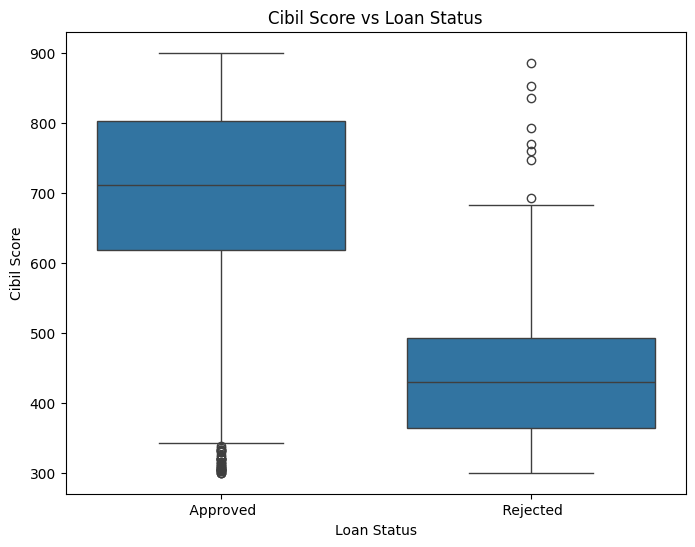

In [57]:
#print("Relationship between Cibil Score and Loan Status:")
plt.figure(figsize=(8, 6))
sns.boxplot(x=' loan_status', y=' cibil_score', data=df)
plt.title('Cibil Score vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Cibil Score')
plt.show()

-  **Which categorical features (Gender, Education, Property_Area) seem to influence loan approval? **

Relationship between Education and Loan Status:


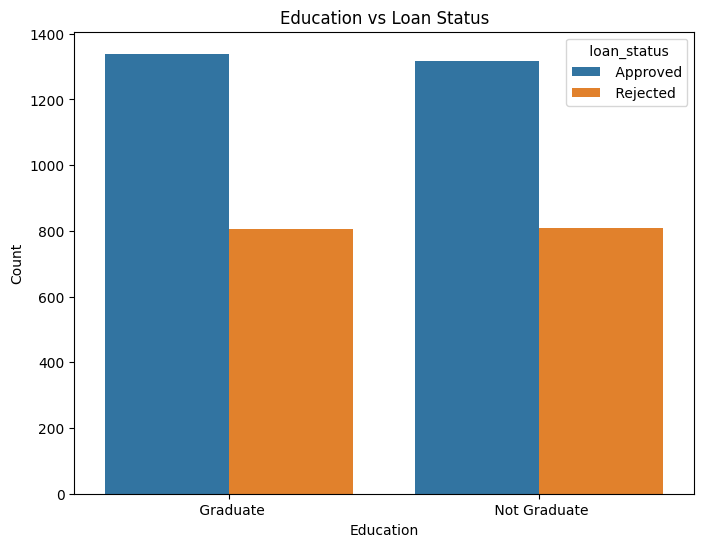

In [58]:
print("Relationship between Education and Loan Status:")
plt.figure(figsize=(8, 6))
sns.countplot(x=' education', hue=' loan_status', data=df)
plt.title('Education vs Loan Status')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()


Relationship between Self Employed and Loan Status:


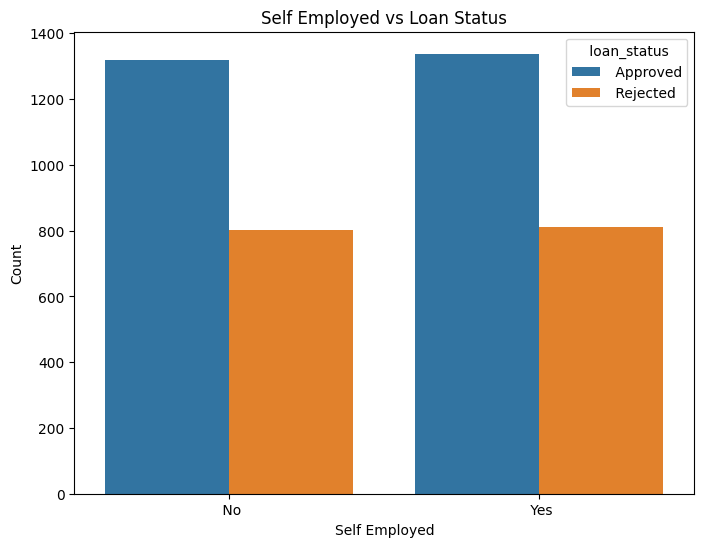

In [59]:
print("Relationship between Self Employed and Loan Status:")
plt.figure(figsize=(8, 6))
sns.countplot(x=' self_employed', hue=' loan_status', data=df)
plt.title('Self Employed vs Loan Status')
plt.xlabel('Self Employed')
plt.ylabel('Count')
plt.show()

### **2. Machine Learning Model Training**

## Data preprocessing


In [60]:
# Handle potential whitespace in column names
df.columns = df.columns.str.strip()

# Identify categorical and numerical columns
categorical_features = ['education', 'self_employed']
numerical_features = ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

# Separate target variable
X = df.drop(['loan_id', 'loan_status'], axis=1)
y = df['loan_status'].apply(lambda x: 1 if x.strip() == 'Approved' else 0) # Encode target and strip whitespace

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# This pipeline is just for preprocessing in this step
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = preprocessing_pipeline.fit_transform(X)

# Display the shape of the processed data to verify the encoding and scaling
print("Shape of processed data:", X_processed.shape)

Shape of processed data: (4269, 13)


## Model training

I checked and train least two machine learning models (e.g., Logistic Regression and Random Forest) on the preprocessed data.


In [61]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Instantiate models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Random Forest model trained.")

Logistic Regression model trained.
Random Forest model trained.


In [62]:
# Split data into training and testing sets without random_state
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2)

# Instantiate models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Random Forest model trained.")

Logistic Regression model trained.
Random Forest model trained.


In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Check the class distribution in y_train
print("Class distribution in y_train:\n", y_train.value_counts())

# Instantiate models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Random Forest model trained.")

Class distribution in y_train:
 loan_status
1    2120
0    1295
Name: count, dtype: int64
Logistic Regression model trained.
Random Forest model trained.


In [64]:
print("Value counts of original 'loan_status' column:\n", df['loan_status'].value_counts())
print("\nValue counts of encoded 'y' variable:\n", y.value_counts())

Value counts of original 'loan_status' column:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Value counts of encoded 'y' variable:
 loan_status
1    2656
0    1613
Name: count, dtype: int64


In [65]:
# Fix the encoding of the target variable
y = df['loan_status'].apply(lambda x: 1 if x.strip() == 'Approved' else 0)

# Split data into training and testing sets with random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Check the class distribution in y_train again
print("Class distribution in y_train after re-encoding:\n", y_train.value_counts())

# Instantiate models
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier(random_state=42)

# Train models
logistic_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)

print("Logistic Regression model trained.")
print("Random Forest model trained.")

Class distribution in y_train after re-encoding:
 loan_status
1    2120
0    1295
Name: count, dtype: int64
Logistic Regression model trained.
Random Forest model trained.


## Model evaluation

Evaluate the trained models using appropriate metrics such as Accuracy, F1-score, and Confusion Matrix.


In [66]:
# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate Logistic Regression model
print("--- Logistic Regression Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

print("\n--- Random Forest Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("F1 Score:", f1_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))

--- Logistic Regression Model Evaluation ---
Accuracy: 0.9039812646370023
F1 Score: 0.9239332096474954
Confusion Matrix:
 [[274  44]
 [ 38 498]]

--- Random Forest Model Evaluation ---
Accuracy: 0.9800936768149883
F1 Score: 0.9841269841269841
Confusion Matrix:
 [[310   8]
 [  9 527]]


## Model selection and saving

I choose the best performing model based on the evaluation metrics and save it for future use.


In [67]:
# Based on the previous evaluation, Random Forest performed better.
best_model = random_forest_model

# Save the best model to a file
joblib.dump(best_model, 'best_loan_approval_model.joblib')

print("Best model (Random Forest) saved successfully.")

Best model (Random Forest) saved successfully.


In [68]:
print("Value counts of original 'loan_status' column:\n", df['loan_status'].value_counts())
print("\nValue counts of encoded 'y' variable:\n", y.value_counts())

Value counts of original 'loan_status' column:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64

Value counts of encoded 'y' variable:
 loan_status
1    2656
0    1613
Name: count, dtype: int64


In [69]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# Make predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("F1 Score:", f1_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))

print("\n--- Random Forest Model Evaluation ---")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("F1 Score:", f1_score(y_test, y_pred_random_forest))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_random_forest))

--- Logistic Regression Model Evaluation ---
Accuracy: 0.9039812646370023
F1 Score: 0.9239332096474954
Confusion Matrix:
 [[274  44]
 [ 38 498]]

--- Random Forest Model Evaluation ---
Accuracy: 0.9800936768149883
F1 Score: 0.9841269841269841
Confusion Matrix:
 [[310   8]
 [  9 527]]


In [78]:
best_model = random_forest_model

joblib.dump(best_model, 'best_loan_approval_model.pkl')

print("Best model (Random Forest) saved successfully.")

Best model (Random Forest) saved successfully.
